Ian Pope 700717419 Big Data Analytics ICP 6

Load data and set up base autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 64    # Compress to 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Fit code using early stopping callback and run

-Stopped at epoch 91

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4729 - val_loss: 0.3261
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3175 - val_loss: 0.3049
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2995 - val_loss: 0.2942
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2895 - val_loss: 0.2876
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2843 - val_loss: 0.2839
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2812 - val_loss: 0.2815
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2790 - val_loss: 0.2798
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2780 - val_loss: 0.2787
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2756 - val_loss: 0.2778
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2755 - val_loss: 0.2771
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2750 - val_loss: 0.2765
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

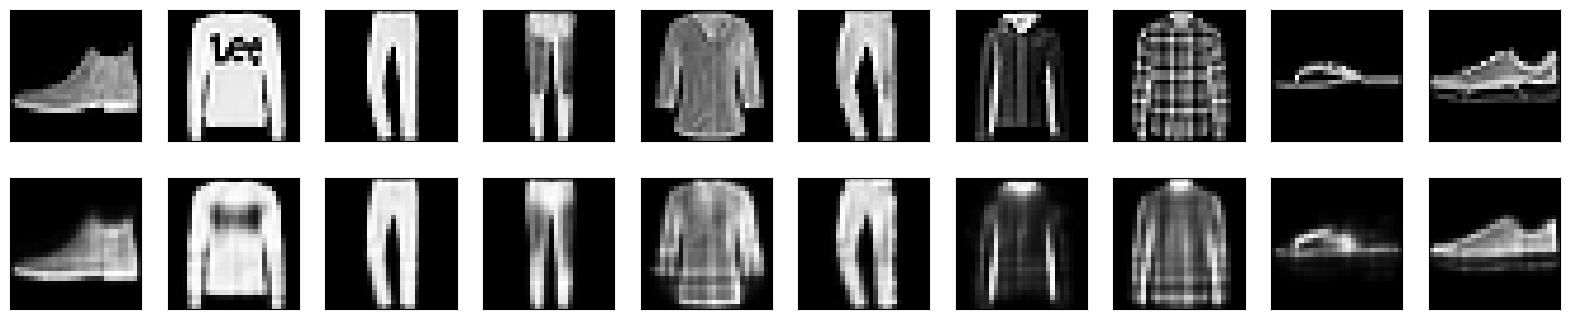

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

# Assuming x_train and x_test are your training and test datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Add the early stopping callback


#Base code below


# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

TerminateOnNaN

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2688 - val_loss: 0.2719
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2691 - val_loss: 0.2719
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2691 - val_loss: 0.2717
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2694 - val_loss: 0.2718
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2690 - val_loss: 0.2718
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2692 - val_loss: 0.2717
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2698 - val_loss: 0.2718
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2698 - val_loss: 0.2717
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2688 - val_loss: 0.2717
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2690 - val_loss: 0.2717
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2688 - val_loss: 0.2718
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

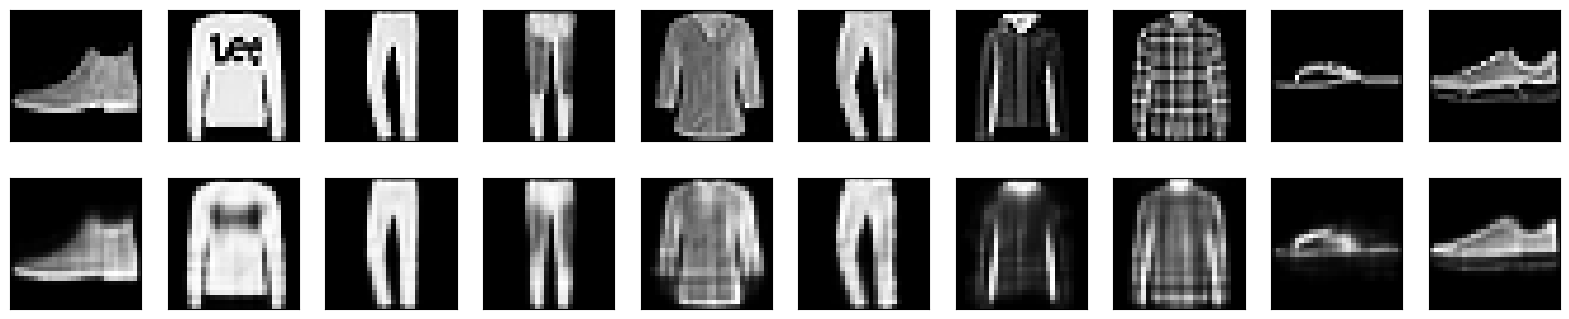

In [ ]:
from tensorflow.keras.callbacks import TerminateOnNaN

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set the number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan])  # Add the TerminateOnNaN callback


#Base Code Below

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ModelCheckpoint

Epoch 1/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686
Epoch 1: val_loss improved from inf to 0.27159, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2686 - val_loss: 0.2716
Epoch 2/50
223/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2687
Epoch 2: val_loss improved from 0.27159 to 0.27152, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2687 - val_loss: 0.2715
Epoch 3/50
217/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2691
Epoch 3: val_loss did not improve from 0.27152
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2691 - val_loss: 0.2716
Epoch 4/50
227/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686
Epoch 4: val_loss improved from 0.27152 to 0.27149, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2686 - val_loss: 0.2715
Epoch 5/50
216/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2688
Epoch 5: val_loss did not improve from 0.27149
23

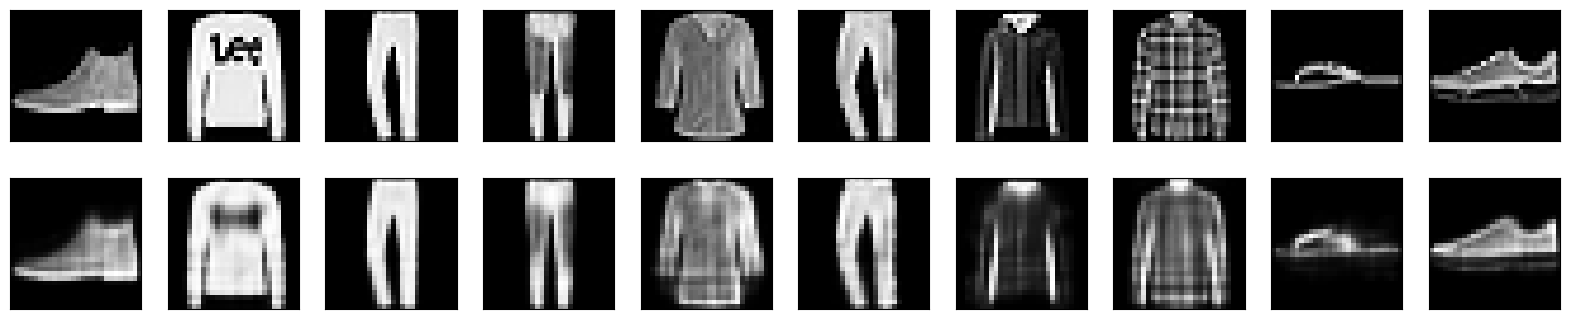

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model


# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback


#Base code below


# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ReduceLROnPlateau

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2681 - val_loss: 0.2715 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2687 - val_loss: 0.2715 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2688 - val_loss: 0.2715 - learning_rate: 0.0010
Epoch 4/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2691
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2691 - val_loss: 0.2715 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2685 - val_loss: 0.2713 - learning_rate: 5.0000e-04
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2686 - val_loss: 0.2713 - learning_rate: 5.0000e-04
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2687 - val_loss: 0.2714 - learning_rate: 5.0000e-04
Epoch 8/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686
Epoch 8: ReduceLROn

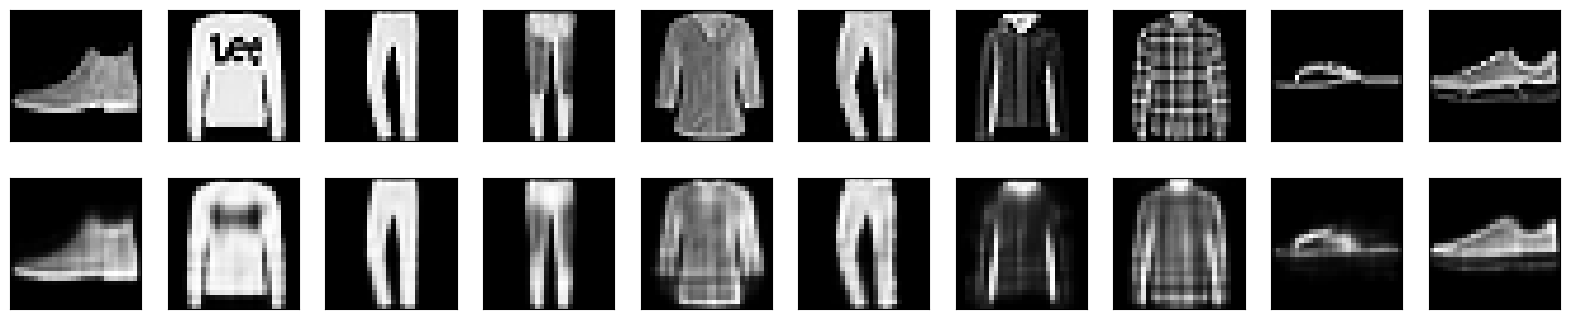

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr])  # Add the ReduceLROnPlateau callback


#Base code below


# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

All four callbacks

Epoch 1/100
226/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2685
Epoch 1: val_loss improved from inf to 0.27118, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2685 - val_loss: 0.2712 - learning_rate: 1.0000e-06
Epoch 2/100
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2683
Epoch 2: val_loss did not improve from 0.27118
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2683 - val_loss: 0.2712 - learning_rate: 1.0000e-06
Epoch 3/100
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2681
Epoch 3: val_loss did not improve from 0.27118
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2681 - val_loss: 0.2712 - learning_rate: 1.0000e-06
Epoch 4/100
217/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2684
Epoch 4: val_loss did not improve from 0.27118
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2684 - val_loss: 0.2712 - learning_rate: 1.0000e-06
Epoch 5/100
218/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2676
Epoch 5: val_loss im

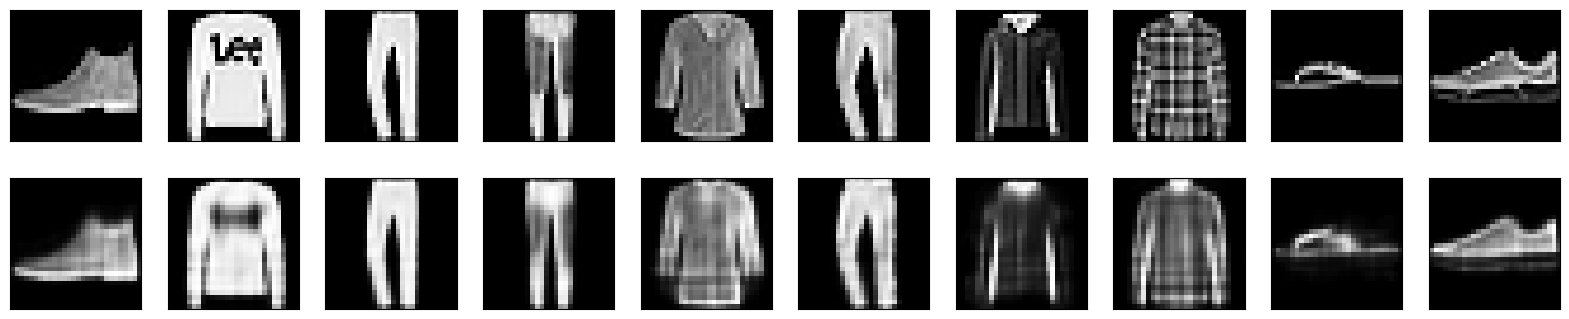

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced


#Put all callbacks in
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr, checkpoint, terminate_on_nan, early_stopping])  # Add the ReduceLROnPlateau callback


#Base code below


# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Reload data from autoencoder_best.keras and use on testing data.

I predict the results will be the same from the loaded model as the previous.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


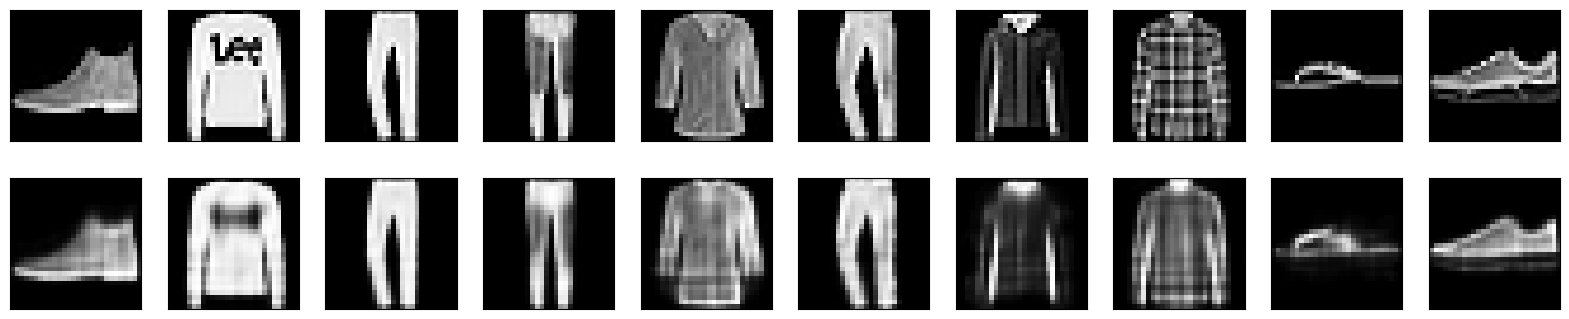

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
best_autoencoder = load_model('autoencoder_best.keras')

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = best_autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


